In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


# Load MNIST dataset

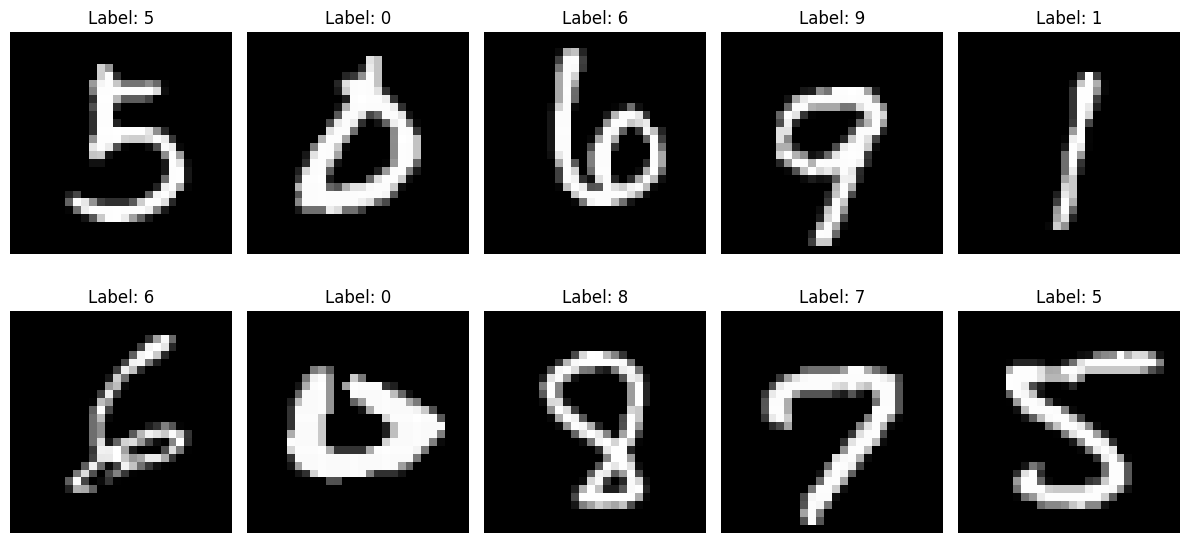

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_images = 10
random_indices = np.random.randint(0, len(x_train), num_images)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Reshape and normalize input data


In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255


# One-hot encode the target labels


In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Split training data into train and validation sets

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define data augmentation parameters

In [7]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2
)

# Fit the datagen on training data
datagen.fit(x_train)


# Define CNN model architecture


In [8]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

# Compile the model

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model with original MNIST dataset

In [10]:
history_orig = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10


375/375 [==============================] - 22s 53ms/step - loss: 0.2462 - accuracy: 0.9290 - val_loss: 0.0915 - val_accuracy: 0.9728
Epoch 2/10
375/375 [==============================] - 20s 52ms/step - loss: 0.0657 - accuracy: 0.9798 - val_loss: 0.0501 - val_accuracy: 0.9858
Epoch 3/10
375/375 [==============================] - 20s 54ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0443 - val_accuracy: 0.9875
Epoch 4/10
375/375 [==============================] - 20s 52ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0416 - val_accuracy: 0.9875
Epoch 5/10
375/375 [==============================] - 23s 61ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0400 - val_accuracy: 0.9877
Epoch 6/10
375/375 [==============================] - 20s 54ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.0374 - val_accuracy: 0.9883
Epoch 7/10
375/375 [==============================] - 21s 55ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0364 - val_accurac

# Train the model with augmented MNIST dataset


In [11]:
model_augmented = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_augmented.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_augmented.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# Fit the augmented data using data augmentation generator


In [12]:
history_augmented = model_augmented.fit(datagen.flow(x_train, y_train, batch_size=128),
                                       steps_per_epoch=len(x_train)/128, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
375/375 [==============================] - 37s 95ms/step - loss: 0.5307 - accuracy: 0.8303 - val_loss: 0.1150 - val_accuracy: 0.9647
Epoch 2/10
375/375 [==============================] - 35s 92ms/step - loss: 0.1949 - accuracy: 0.9398 - val_loss: 0.0774 - val_accuracy: 0.9751
Epoch 3/10
375/375 [==============================] - 36s 95ms/step - loss: 0.1384 - accuracy: 0.9572 - val_loss: 0.0556 - val_accuracy: 0.9839
Epoch 4/10
375/375 [==============================] - 36s 95ms/step - loss: 0.1095 - accuracy: 0.9664 - val_loss: 0.0419 - val_accuracy: 0.9861
Epoch 5/10
375/375 [==============================] - 36s 97ms/step - loss: 0.0923 - accuracy: 0.9710 - val_loss: 0.0380 - val_accuracy: 0.9883
Epoch 6/10
375/375 [==============================] - 37s 98ms/step - loss: 0.0840 - accuracy: 0.9742 - val_loss: 0.0384 - val_accuracy: 0.9883
Epoch 7/10
375/375 [==============================] - 35s 94ms/step - loss: 0.0756 - accuracy: 0.9763 - val_loss: 0.0368 - val_accuracy:

# Plot accuracy

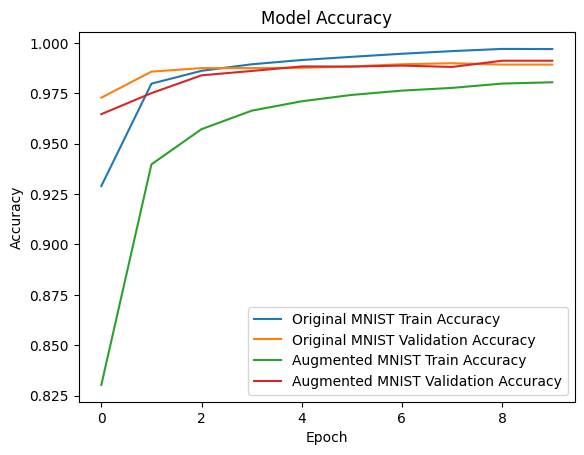

In [13]:
plt.plot(history_orig.history['accuracy'], label='Original MNIST Train Accuracy')
plt.plot(history_orig.history['val_accuracy'], label='Original MNIST Validation Accuracy')
plt.plot(history_augmented.history['accuracy'], label='Augmented MNIST Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented MNIST Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Evaluate the models on test data

In [14]:
score_original = model.evaluate(x_test, y_test, verbose=0)
score_augmented = model_augmented.evaluate(x_test, y_test, verbose=0)

print(f"Original Model Test Loss: {score_original[0]}")
print(f"Original Model Test Accuracy: {score_original[1]}")

print(f"Augmented Model Test Loss: {score_augmented[0]}")
print(f"Augmented Model Test Accuracy: {score_augmented[1]}")

Original Model Test Loss: 0.03501812368631363
Original Model Test Accuracy: 0.9896000027656555
Augmented Model Test Loss: 0.026433920487761497
Augmented Model Test Accuracy: 0.9916999936103821
